In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import getpass

In [2]:
def idx_to_time(arr, samp_rate):
    print(len(arr))
    return np.arange(len(arr))/samp_rate 

In [3]:
def matched_filter(ref_filename, sig_filename, pulse_t, samp_rate, start_time, stop_time, flip = False):
    
    start_samp = int(start_time*samp_rate)
    stop_samp = int(stop_time*samp_rate)
    num_samp = stop_samp - start_samp
    
    t = np.linspace(0, num_samp/samp_rate, num = int(num_samp))
    t_corr = np.linspace(-num_samp/samp_rate, num_samp/samp_rate, num = int(2*num_samp-1))
    
    #Extracting and truncating signal data
    ref = np.fromfile(open(ref_filename), dtype="complex64")[start_samp:stop_samp]
    sig = np.fromfile(open(sig_filename), dtype="complex64")[start_samp:stop_samp]
    
    #Correlating and flipping the signal (or not)
    if flip == False:
        corr = scipy.signal.correlate(sig, ref)
    if flip == True:
        corr = scipy.signal.correlate(-sig, ref)
    
    #Self-correlating the reference signal
    self_corr = scipy.signal.correlate(ref, ref)
    
    #Raw truncated signal plot
    f1, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t, ref)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference Chirp")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t, sig)
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title('Delayed Signal Chirp')
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f1.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Self correlation and signal correlation plot
    f2, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference self-correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t_corr, corr, color = '#ff7f0e')
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Reference and signal correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f2.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Superimposed self/signal correlation with zoom plot
    f3, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr, label = 'Reference')
    ax[0].plot(t_corr, corr, label = 'Rignal')
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Ampltidue")
    ax[0].set_title("Self-correlation and signal correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[0].legend()

    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], self_corr[int(num_samp-50):int(num_samp+50)], 
                 label = 'Reference')
    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], corr[int(num_samp-50):int(num_samp+50)], 
                label = 'Signal')
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Up-close signal and self- correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].legend()
    
    f3.subplots_adjust(wspace = 0)
    
    plt.show()
    
    print(scipy.signal.find_peaks(self_corr[int(num_samp-50):int(num_samp+50)], height = 2))
    print(scipy.signal.find_peaks(corr[int(num_samp-50):int(num_samp+50)], height = 2))

/home/gprlab/miniconda3/envs/gprdev/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


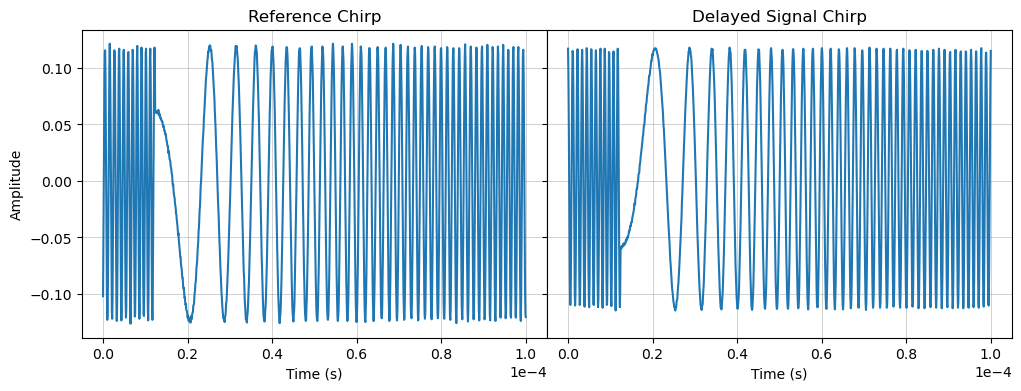

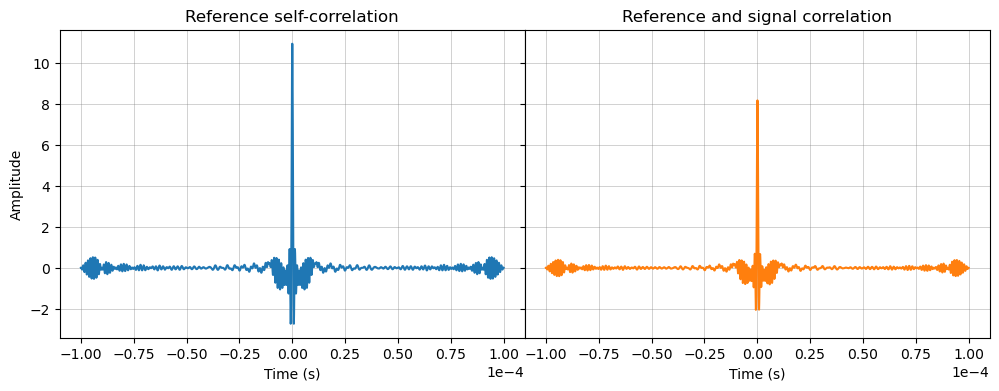

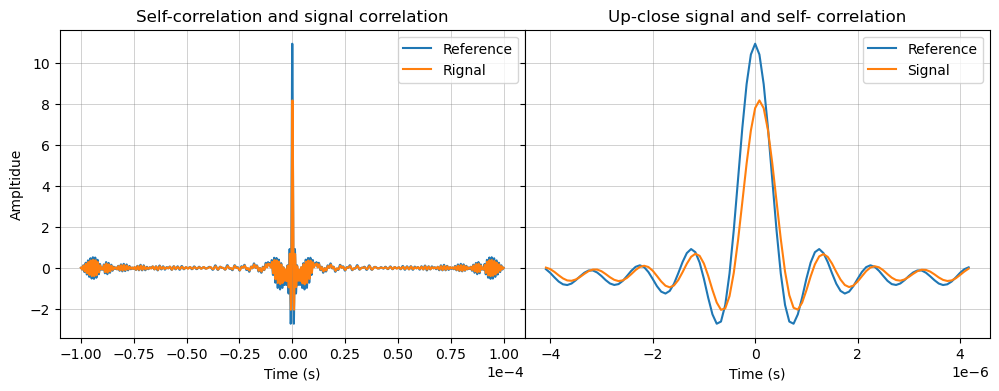

(array([49]), {'peak_heights': array([10.94112396])})
(array([50]), {'peak_heights': array([8.17733765])})


/home/gprlab/miniconda3/envs/gprdev/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


In [4]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log01", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = True)

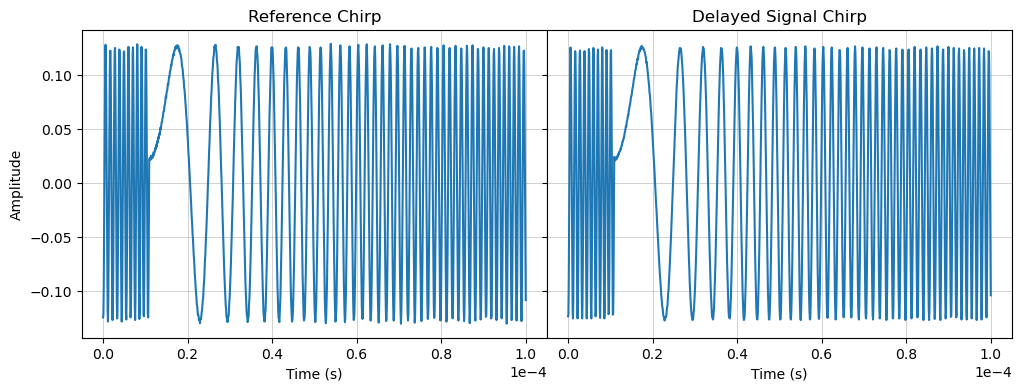

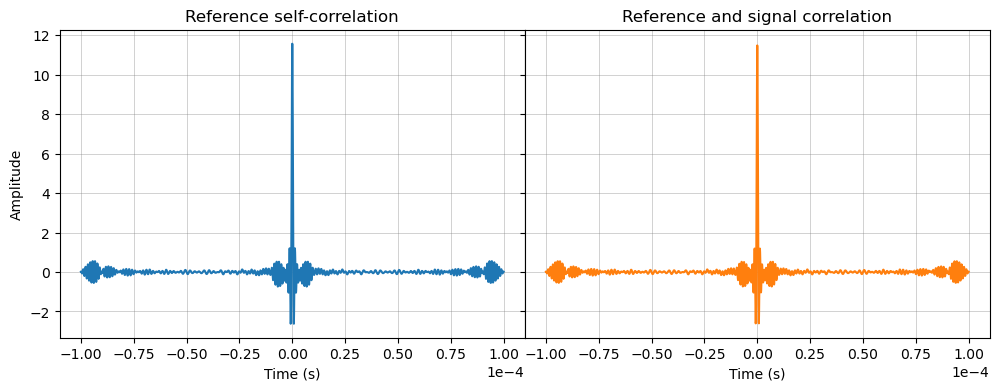

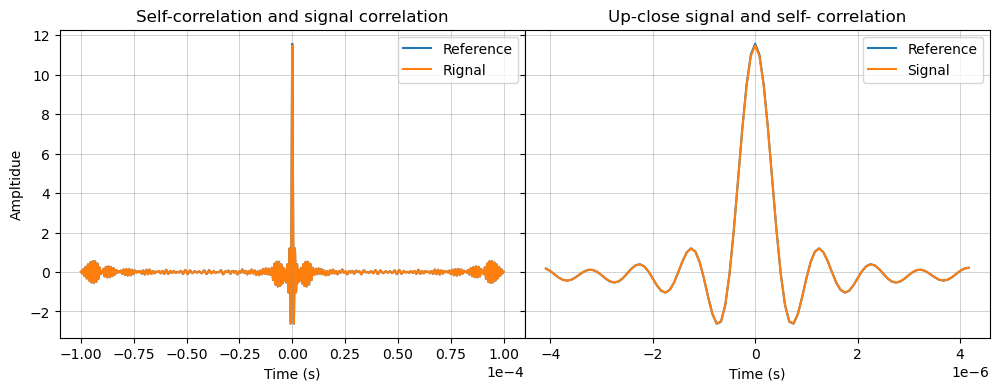

(array([49]), {'peak_heights': array([11.56917191])})
(array([49]), {'peak_heights': array([11.48204708])})


In [5]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log02", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log02", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

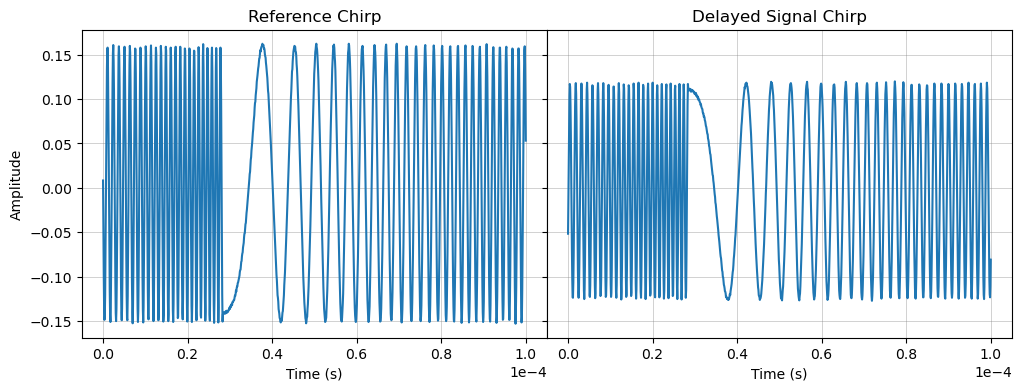

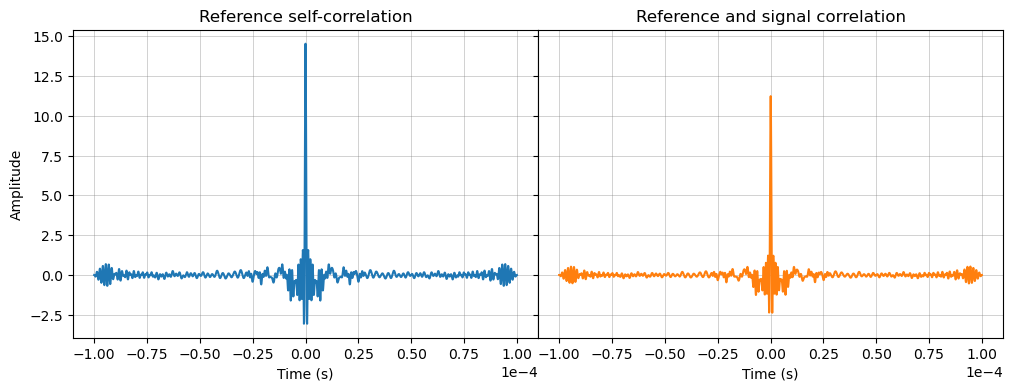

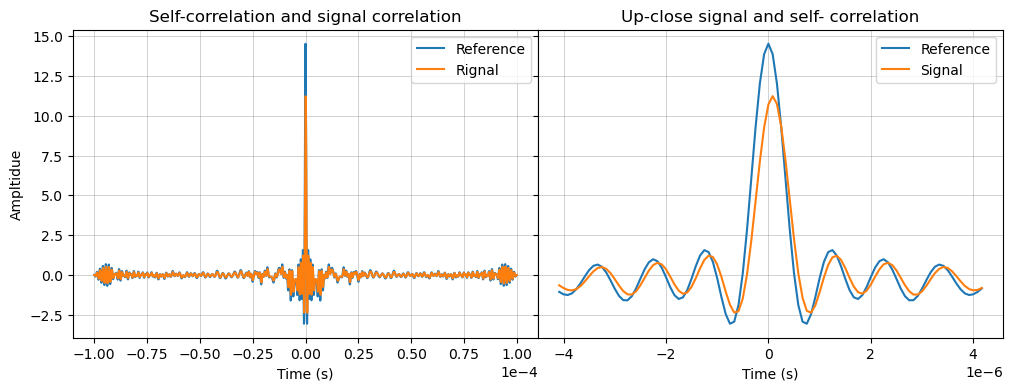

(array([49]), {'peak_heights': array([14.52357483])})
(array([50]), {'peak_heights': array([11.22910118])})


In [6]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log03", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log03", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = True)

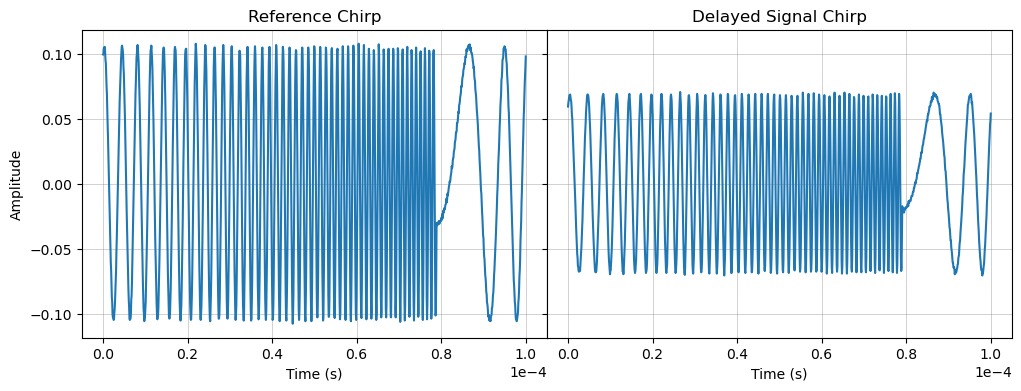

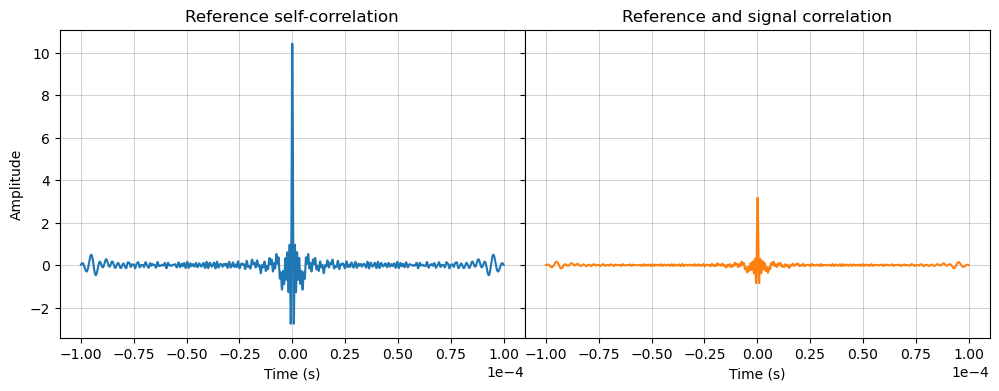

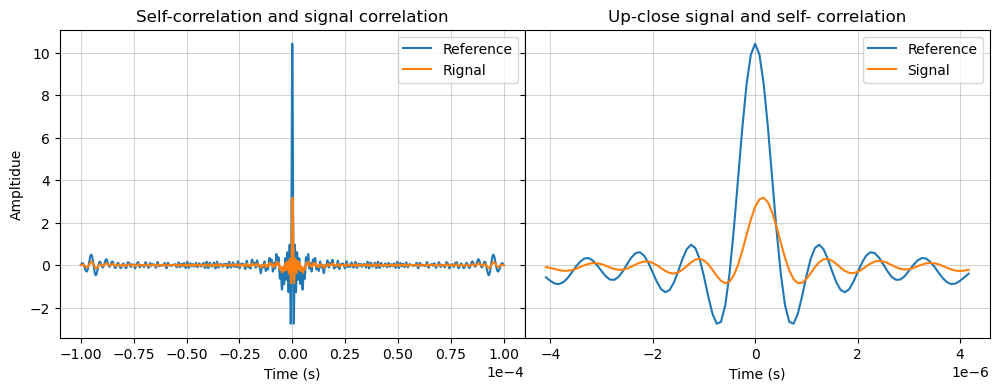

(array([49]), {'peak_heights': array([10.41642857])})
(array([51]), {'peak_heights': array([3.17366838])})


In [7]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log04", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log04", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

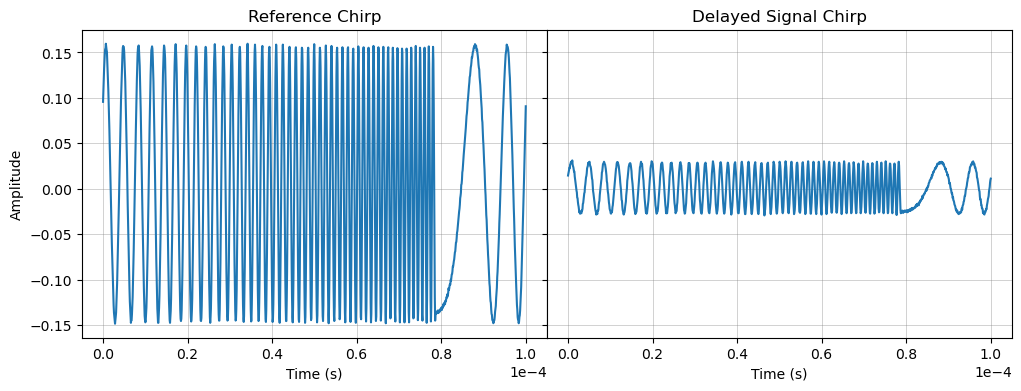

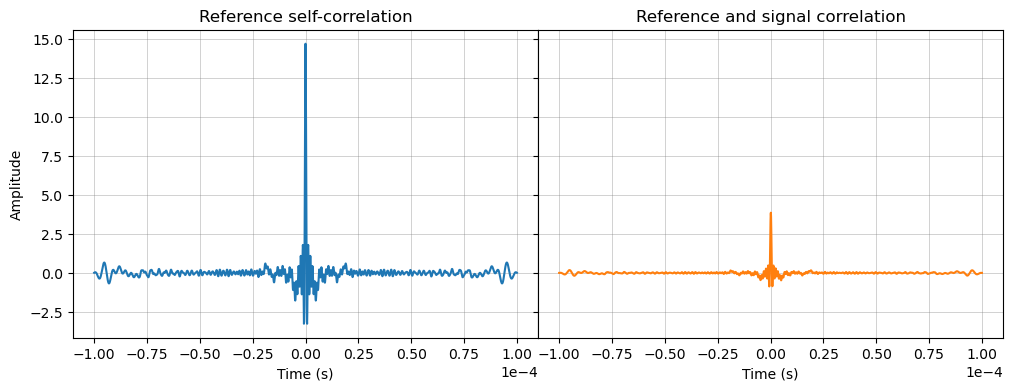

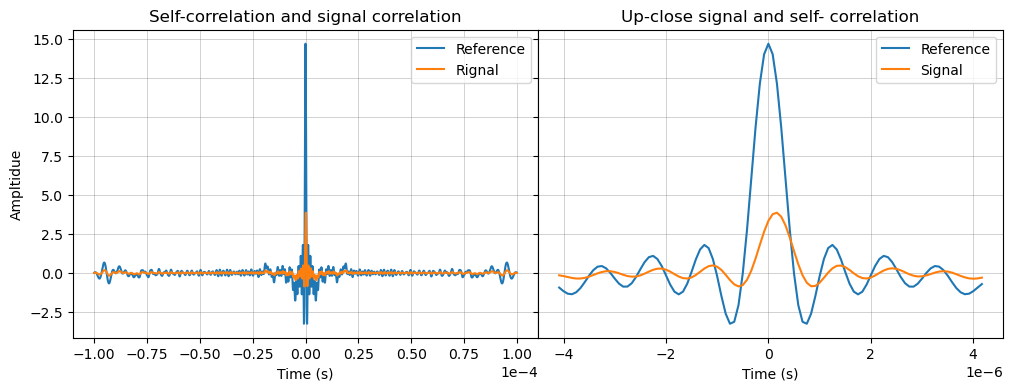

(array([49]), {'peak_heights': array([14.66939068])})
(array([51]), {'peak_heights': array([3.8534739])})


In [8]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log05", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log05", 
               1/10000, 12e6, 0.1, 0.1+(1*1e-4), flip = False)

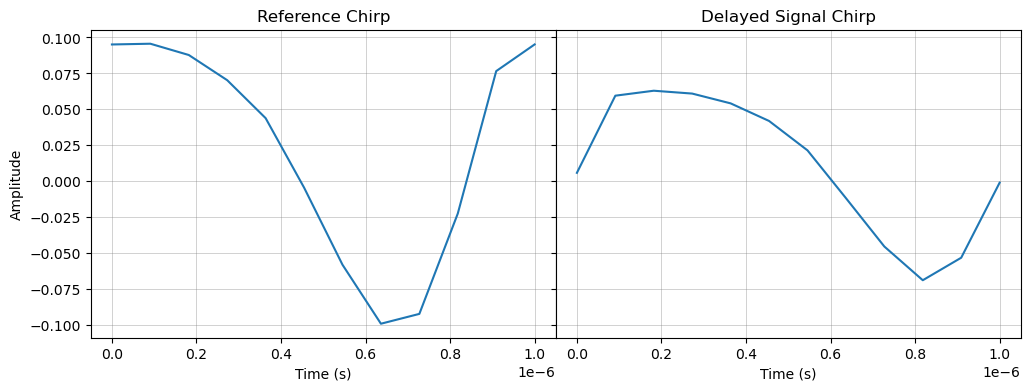

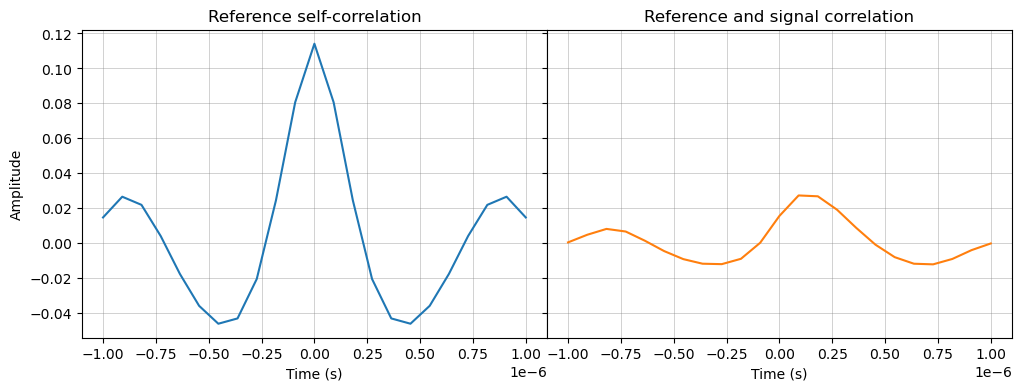

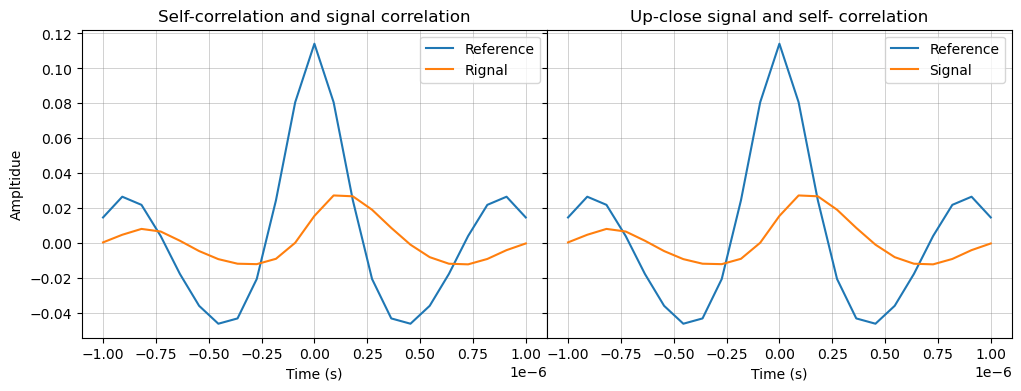

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [9]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log06", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log06", 
               1/10000, 12e6, 0.1, 0.1+(1/1e6), flip = False)

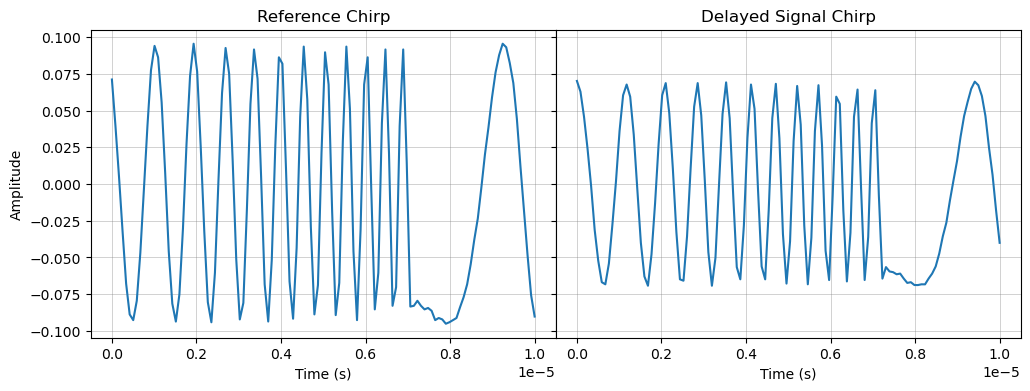

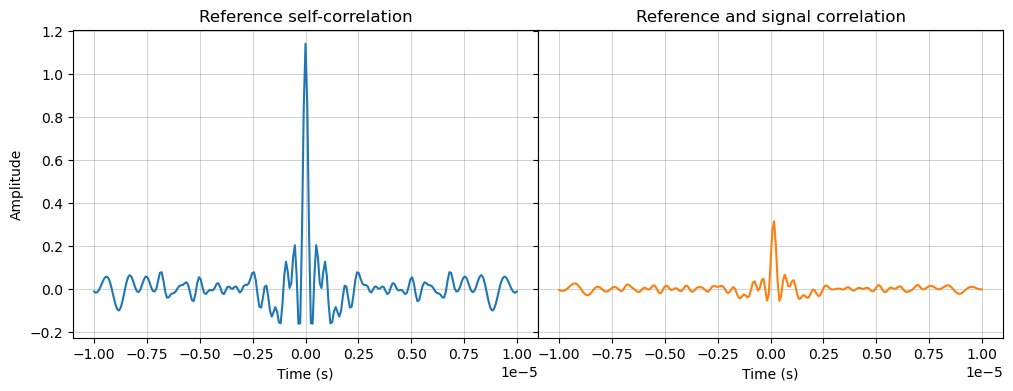

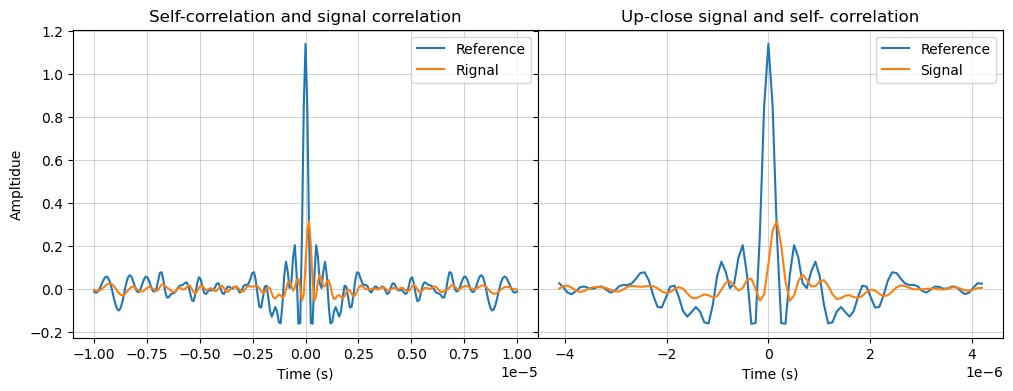

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [10]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log07", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log07", 
               1/10000, 12e6, 0.1, 0.1+(1/1e5), flip = False)

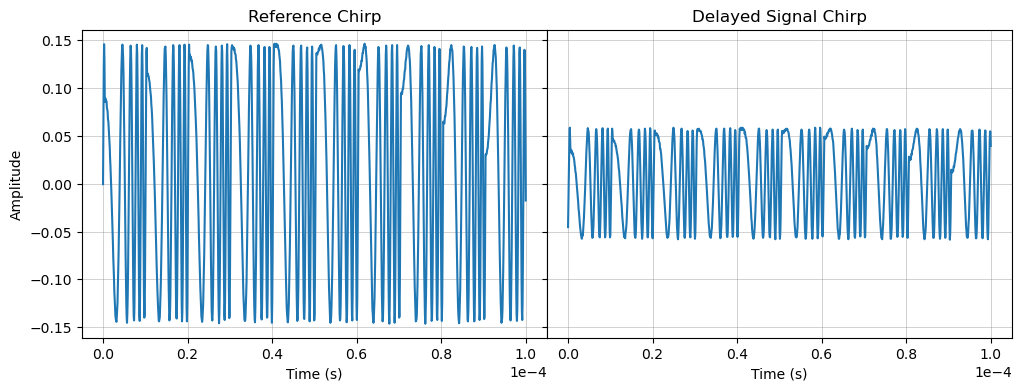

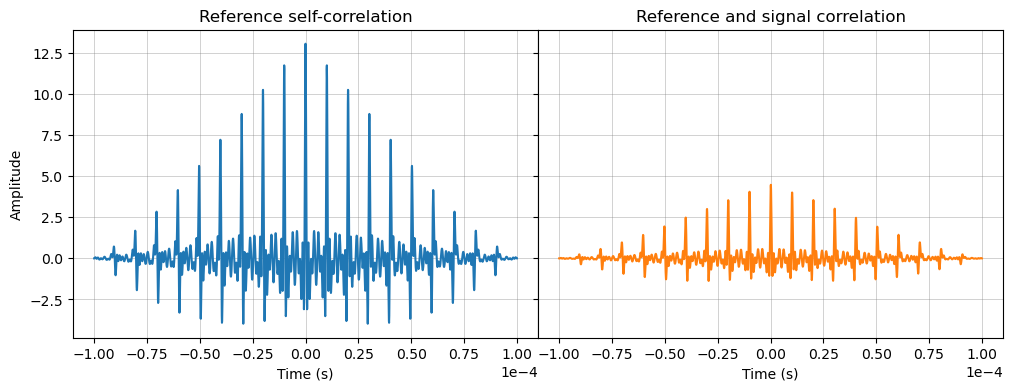

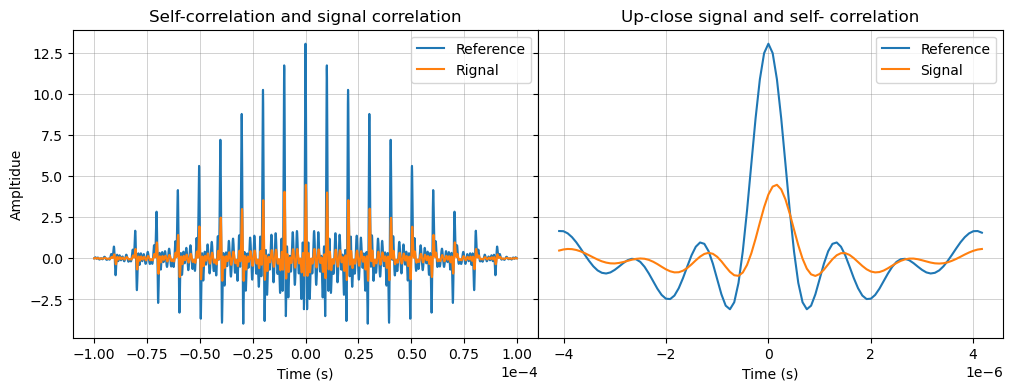

(array([49]), {'peak_heights': array([13.05313587])})
(array([51]), {'peak_heights': array([4.47417736])})


In [11]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log08", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log08", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

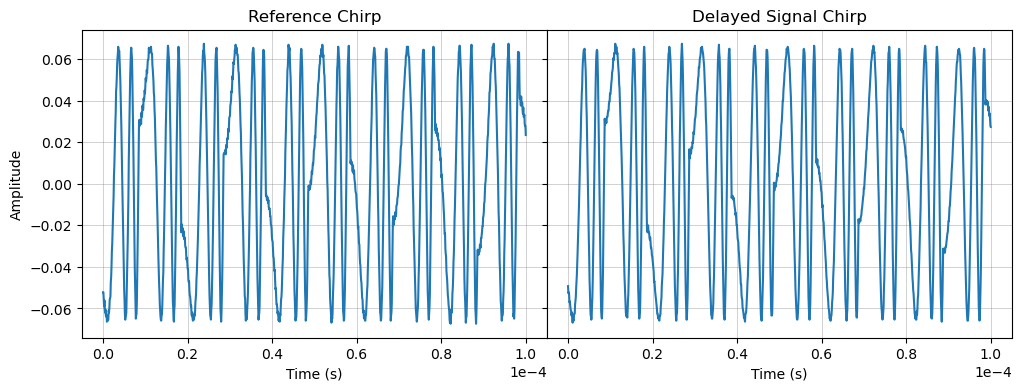

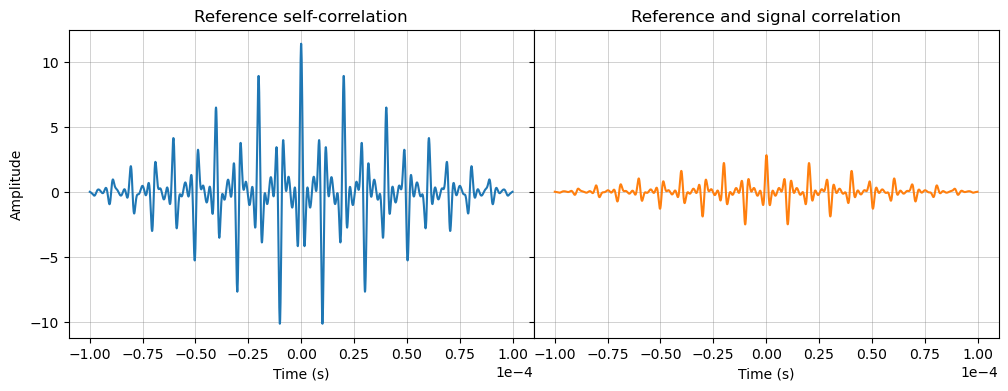

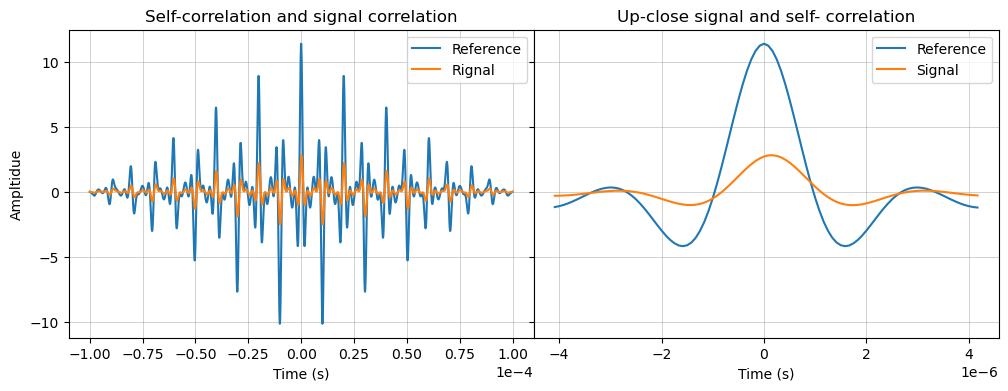

(array([49]), {'peak_heights': array([11.38639259])})
(array([51]), {'peak_heights': array([2.80968738])})


In [12]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log09", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log09", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

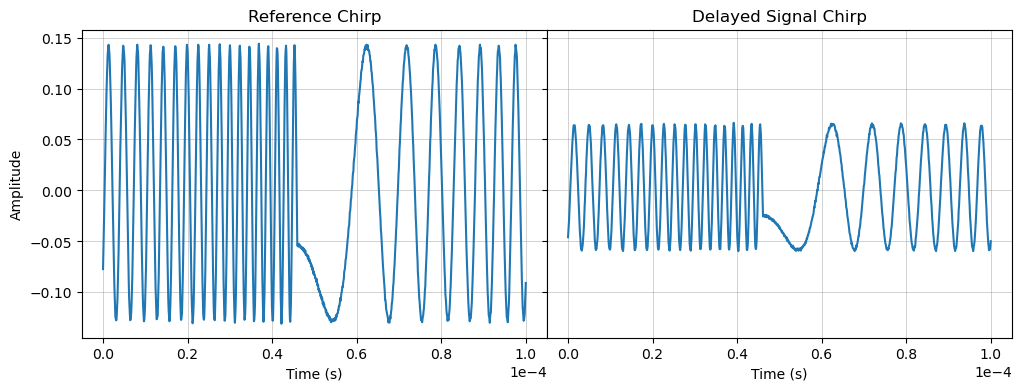

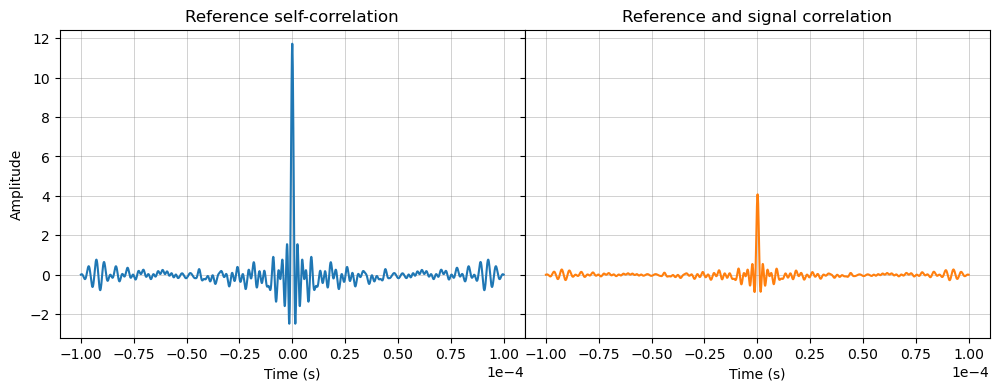

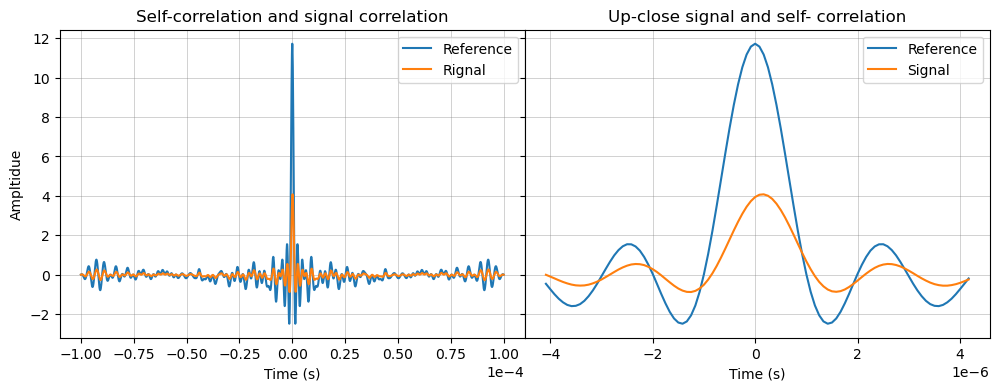

(array([49]), {'peak_heights': array([11.71983624])})
(array([51]), {'peak_heights': array([4.08006001])})


In [13]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log10", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log10", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

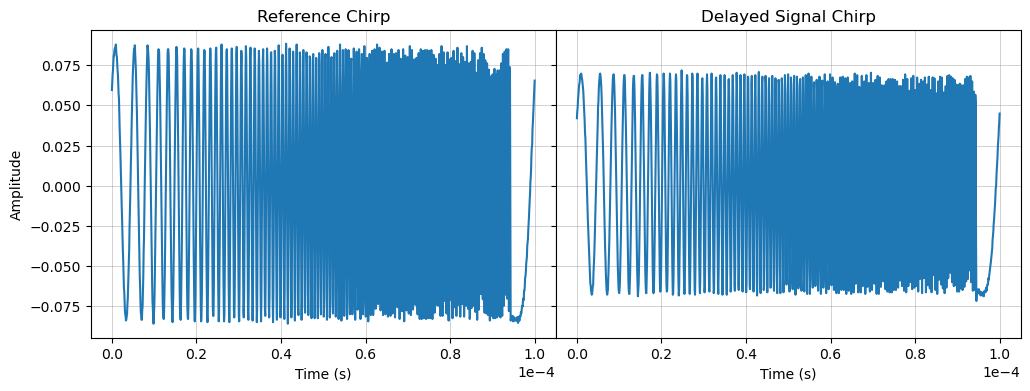

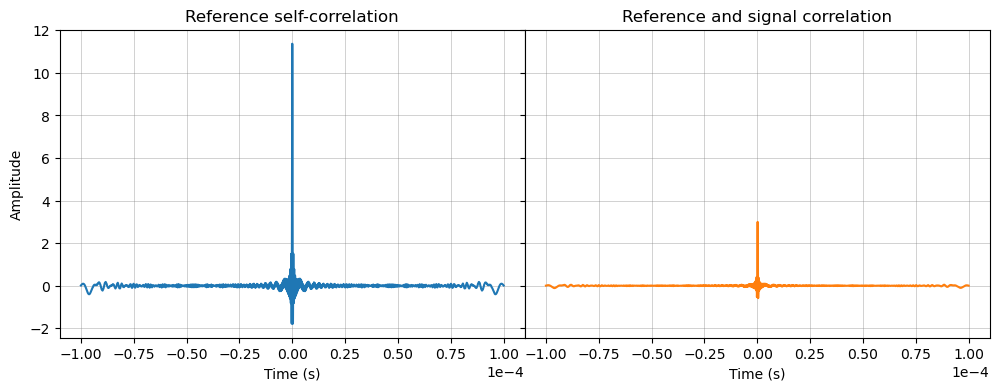

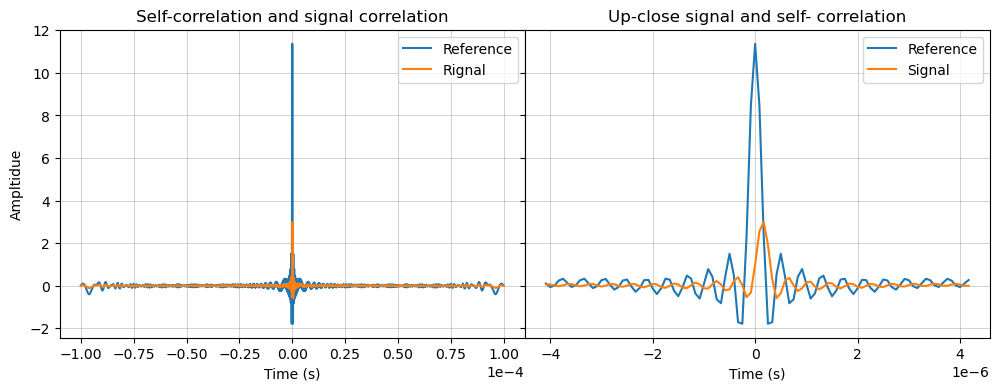

(array([49]), {'peak_heights': array([11.37217903])})
(array([51]), {'peak_heights': array([2.99874043])})


In [14]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log11", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log11", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

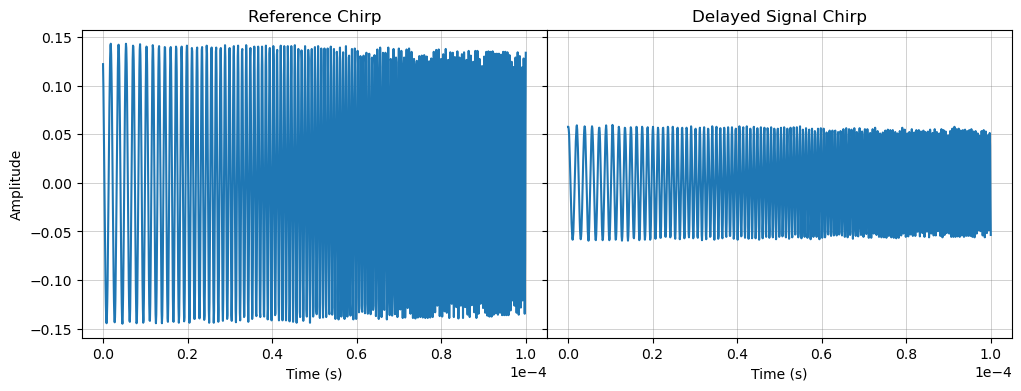

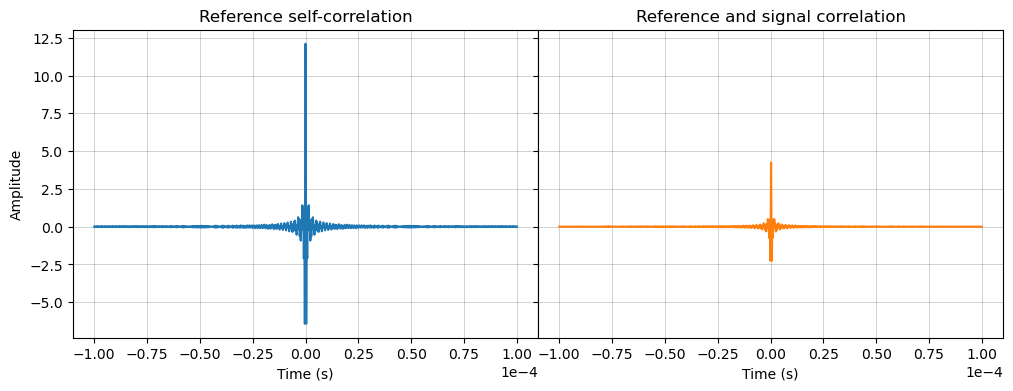

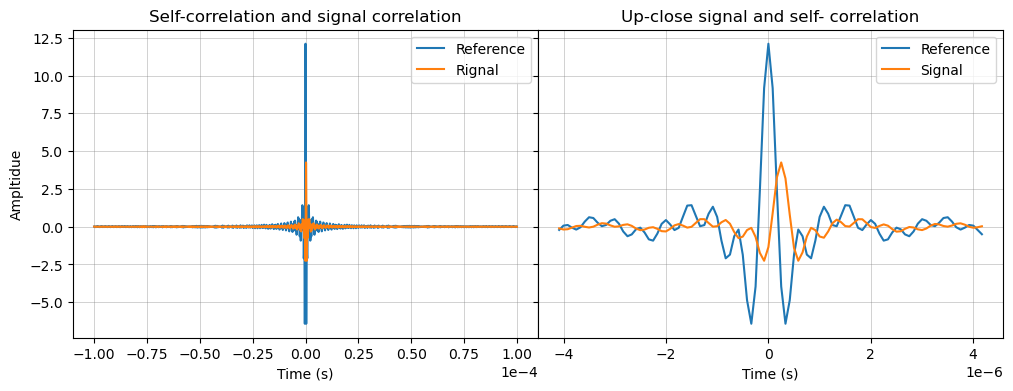

(array([49]), {'peak_heights': array([12.11039066])})
(array([52]), {'peak_heights': array([4.25319099])})


In [15]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log12", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log12", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

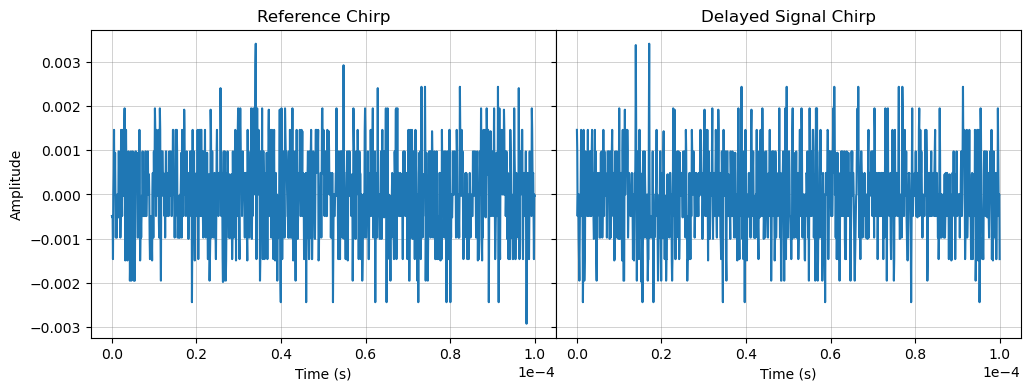

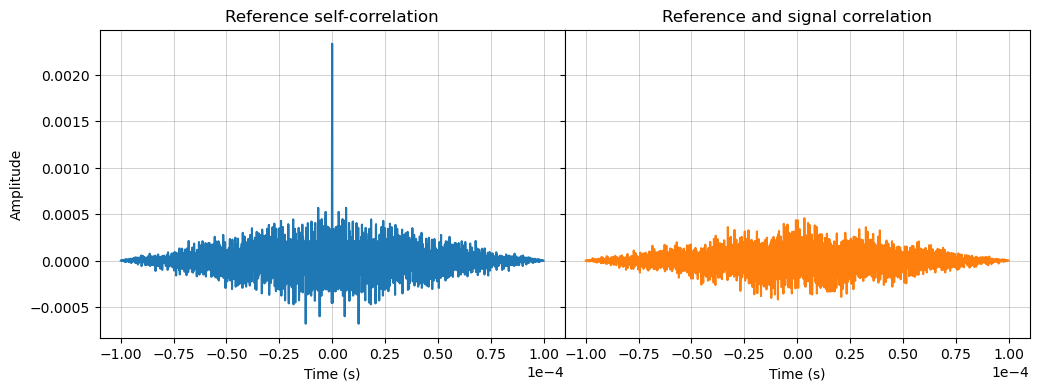

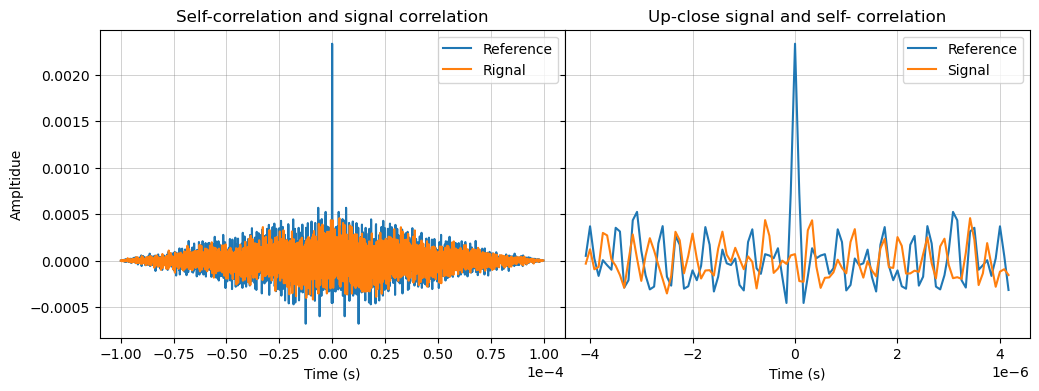

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [16]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log13", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log13", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)

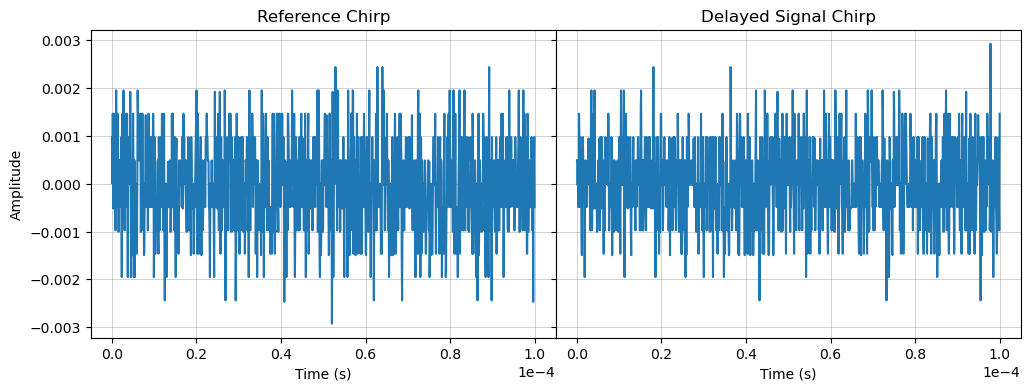

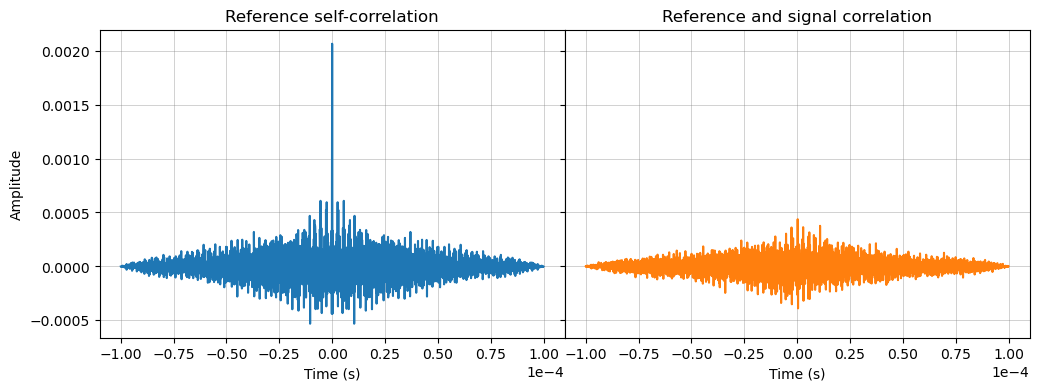

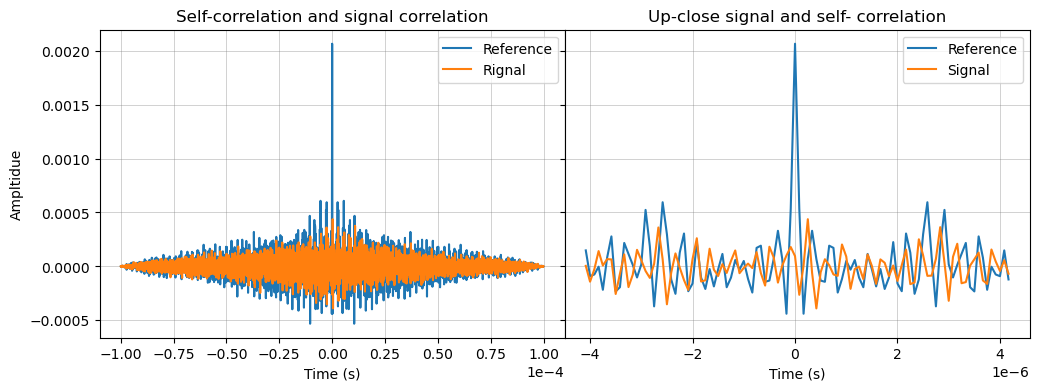

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})
(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})


In [17]:
matched_filter("/home/"+getpass.getuser()+"/Desktop/gnu_log/out0_log14", "/home/"+getpass.getuser()+"/Desktop/gnu_log/out1_log14", 
               1/10000, 12e6, 0.1, 0.1+(1/1e4), flip = False)
